In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich



Text(0.5, 1.0, 'The whole world')

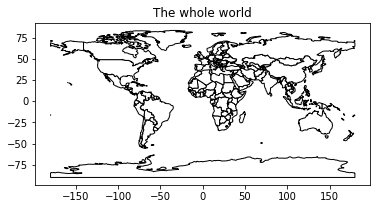

In [2]:
world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(repr(world_df.crs))
world_df.plot(color='white', edgecolor='black')
plt.title('The whole world')

Text(0.5, 1.0, 'USA')

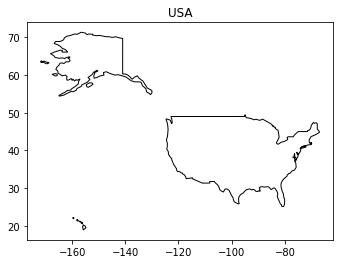

In [3]:
usa_df = world_df[world_df["iso_a3"] == 'USA']
usa_df.plot(color='white', edgecolor='black')
plt.title('USA')

In [4]:
# Whole tiles
tiles_df = gpd.read_file('output\covering_tiles.json')
tiles_df = tiles_df.rename(columns={'TileName': 'Name'})
print(repr(tiles_df.crs))
print(tiles_df)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

       Name                                           geometry
0     10UGU  POLYGON Z ((-120.28118 48.72093 0.00000, -118....
1     11TLN  POLYGON Z ((-119.67207 47.82260 0.00000, -118....
2     11ULP  POLYGON Z ((-119.71936 48.72091 0.00000, -118....
3     12TUM  POLYGON Z ((-113.43120 42.42690 0.00000, -112....
4     12TVM  POLYGON Z ((-112.21648 42.44624 0.00000, -110....
...     ...                                                ...
1179  36JTR  POLYGON Z ((29.99818 -26.18805 0.00000, 31.096...
1180  53HPB  POLYGON Z ((136.08714 -34.33630 0.00000, 137.2...
1181  54HUH  POLYGON Z ((138.84898 -33.42038 0.00000, 140.0...
1182  55HCV  POLYGON Z ((144.77762 -36.12374 0.00000, 145.9.

D:\anaconda3\envs\gis\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


509 tiles in join


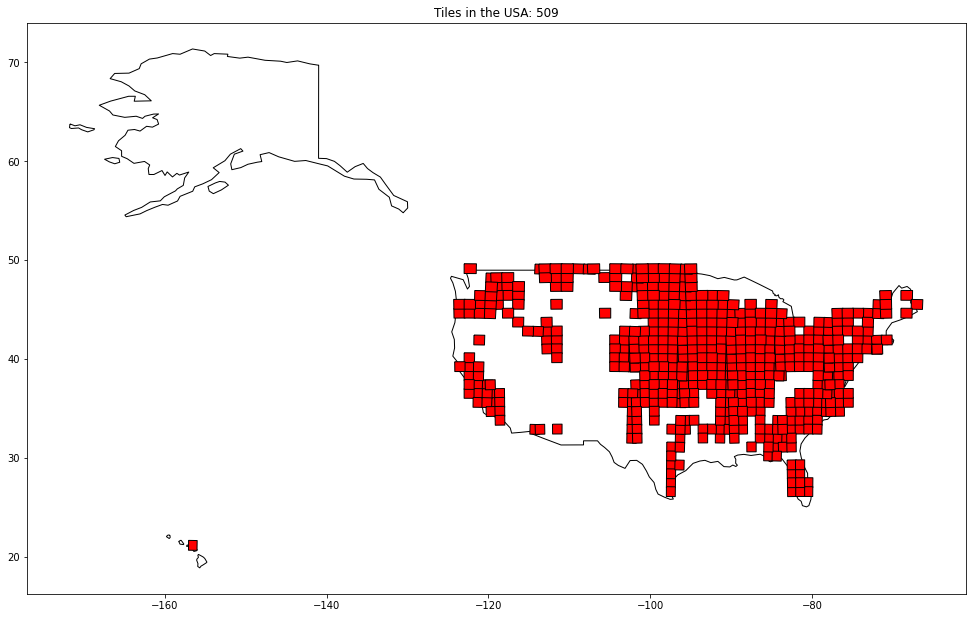

In [5]:
join = gpd.sjoin(tiles_df, usa_df, how="inner", op='intersects')
join_tiles = join[["Name", "geometry"]]
join_tiles = join_tiles.drop_duplicates()
print(len(join_tiles), 'tiles in join')

ax = usa_df.plot(color='white', edgecolor='black')
join_tiles.plot(color='red', edgecolor='black', ax=ax)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title(f'Tiles in the USA: {len(join_tiles)}')
plt.savefig('usa_tiles.png')

In [6]:
# 10-way subtiles
# subtiles_df = gpd.read_file('output/covering_tiles_split10.json')
subtiles_df = gpd.read_file('output_split10/covering_tiles.json')
subtiles_df = subtiles_df.rename(columns={'TileName': 'Name'})
print(repr(subtiles_df.crs))
subtiles_df

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich



,Name,geometry
0,10UGU_36,"POLYGON Z ((-119.72325 48.11130 0.00000, -119...."
1,10UGU_37,"POLYGON Z ((-119.72956 48.01269 0.00000, -119...."
2,10UGU_38,"POLYGON Z ((-119.73587 47.91407 0.00000, -119...."
3,10UGU_47,"POLYGON Z ((-119.58259 48.00831 0.00000, -119...."
4,10UGU_98,"POLYGON Z ((-118.85573 47.88790 0.00000, -118...."
...,...,...
17495,53HPB_76,"POLYGON Z ((137.05633 -34.91685 0.00000, 137.0..."
17496,53HPB_86,"POLYGON Z ((137.17650 -34.91518 0.00000, 137.1..."
17497,55HCV_33,"POLYGON Z ((145.25885 -36.42711 0.00000, 145.2..."
17498,55HCV_41,"POLYGON Z ((145.38545 -36.23089 0.00000, 145.3..."


In [7]:
# subtiles_df.columns
# subtiles_df[subtiles_df["TileName"].str.contains('10UGU')]
[g.wkt for g in subtiles_df["geometry"][:10]]

['POLYGON Z ((-119.7232528792 48.11130249320004 0, -119.7295621811 48.01268717580005 0, -119.87653384295 48.01706435850005 0, -119.8705067204 48.11569483910004 0, -119.7232528792 48.11130249320004 0))',
 'POLYGON Z ((-119.7295621811 48.01268717580005 0, -119.735871483 47.91407185840005 0, -119.8825609655 47.91843387790005 0, -119.87653384295 48.01706435850005 0, -119.7295621811 48.01268717580005 0))',
 'POLYGON Z ((-119.735871483 47.91407185840005 0, -119.7421807849 47.81545654100005 0, -119.88858808805 47.81980339730005 0, -119.8825609655 47.91843387790005 0, -119.735871483 47.91407185840005 0))',
 'POLYGON Z ((-119.58259051925 48.00830999310005 0, -119.5891820005 47.90970983890005 0, -119.735871483 47.91407185840005 0, -119.7295621811 48.01268717580005 0, -119.58259051925 48.00830999310005 0))',
 'POLYGON Z ((-118.855734588 47.88789974140006 0, -118.863736966 47.78937540320005 0, -119.01014426915 47.79372225950006 0, -119.0024240705 47.89226176090006 0, -118.855734588 47.887899741400

In [8]:
join_subtiles = gpd.sjoin(subtiles_df, usa_df, how="inner", op='intersects')
join_subtiles = join_subtiles[["Name", "geometry"]]
join_subtiles = join_subtiles.drop_duplicates()
print(len(join_subtiles), 'tiles in join')

D:\anaconda3\envs\gis\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


12379 tiles in join


In [10]:
plt.clf()
ax = usa_df.plot(color='white', edgecolor='black', linewidth=1)
join_subtiles.plot(color='red', edgecolor='black', linewidth=0.1, ax=ax)
fig = plt.gcf()
fig.set_size_inches(185, 105)
plt.title(f'Tiles in the USA (10-way split): {len(join_subtiles)}')
plt.savefig('usa_subtiles.png')

<Figure size 432x288 with 0 Axes>